<a href="https://colab.research.google.com/github/hatchdavid1/Dimensionality_reduction/blob/main/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA VS LDA

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris  = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X,y)

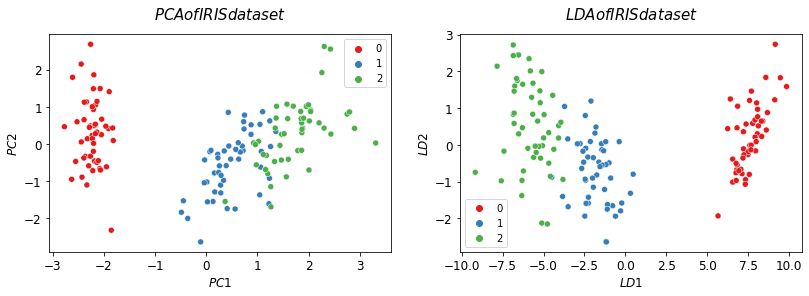

In [6]:
#### Graphic
import itertools
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("$PCA  of  IRIS  dataset$", fontsize=15, pad=15)
ax[1].set_title("$LDA  of  IRIS  dataset$", fontsize=15, pad=15)
ax[0].set_xlabel("$PC1$", fontsize=12)
ax[0].set_ylabel("$PC2$", fontsize=12)
ax[1].set_xlabel("$LD1$", fontsize=12)
ax[1].set_ylabel("$LD2$", fontsize=12)

plt.show();

# Kernel PCA vs PCA

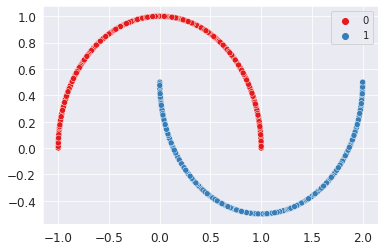

In [8]:
## Moons dataset
from sklearn.datasets import make_moons
sns.set_style('darkgrid')

X, y = make_moons(n_samples = 500, random_state = 42)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette='Set1')
plt.show()

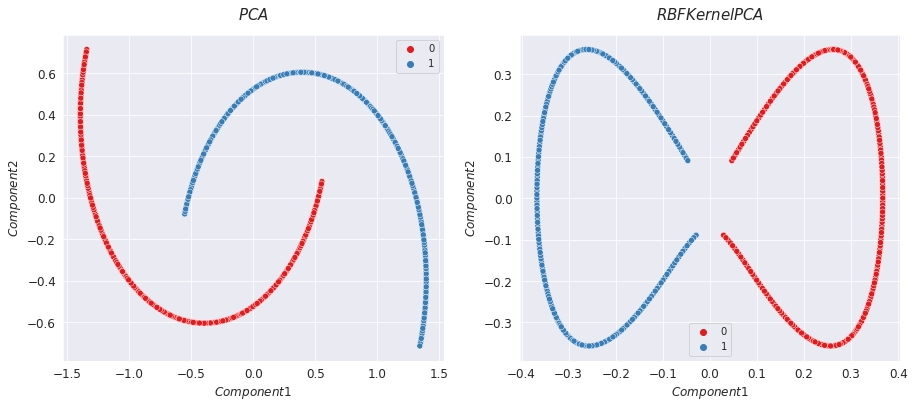

In [11]:
### PCA vs Kernel PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel= 'rbf', gamma=15, random_state= 42) ##rbf = radial basis function kernel | gamma kernel coeficient

X_kpca = kpca.fit_transform(X)

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_kpca[:,0], X_kpca[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title('$PCA$', fontsize = 15, pad = 15)
ax[1].set_title('$RBF Kernel PCA$', fontsize = 15, pad = 15)
ax[0].set_xlabel('$Component 1$', fontsize = 12)
ax[0].set_ylabel('$Component 2$', fontsize = 12)
ax[1].set_xlabel('$Component 1$', fontsize = 12)
ax[1].set_ylabel('$Component 2$', fontsize = 12)
fig.show()